In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pandas as pd
import pandas_profiling as pp

## Jeu de données des iris de Fisher
Le jeu de données des iris a ést très connu. Il correspond à un problème de classification multi-classe classique et très simple à résoudre.     

Ce jeu de données, qui a été utilisé pour illustrer le fonctionnement d'un grand nombre d'algorithme a entre autres une description sur [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).    
Le jeu de données comprend 50 échantillons de chacune des **trois espèces d'iris** (`Iris setosa`, `Iris virginica` et `Iris versicolor`).  **Quatre caractéristiques ont été mesurées** à partir de chaque échantillon : **la longueur et la largeur des sépales et des pétales**, en centimètres. Sur la base de la combinaison de ces quatre variables, [Fisher](https://fr.wikipedia.org/wiki/Ronald_Aylmer_Fisher) a élaboré un modèle linéaire permettant de distinguer les espèces les unes des autres. 

In [3]:
(data,target) = datasets.load_iris(return_X_y=True)
nomDesVariables = ['hauteur sépale','largeur sépale','hauteur pétale','largeur pétale']
# hauteur et la largeur du sépale (HS et LS), la hauteur et la largeur du pétale (HP et LP).

In [4]:
df_iris = pd.DataFrame(data,columns=nomDesVariables)
df_iris.describe()

,hauteur sépale,largeur sépale,hauteur pétale,largeur pétale
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


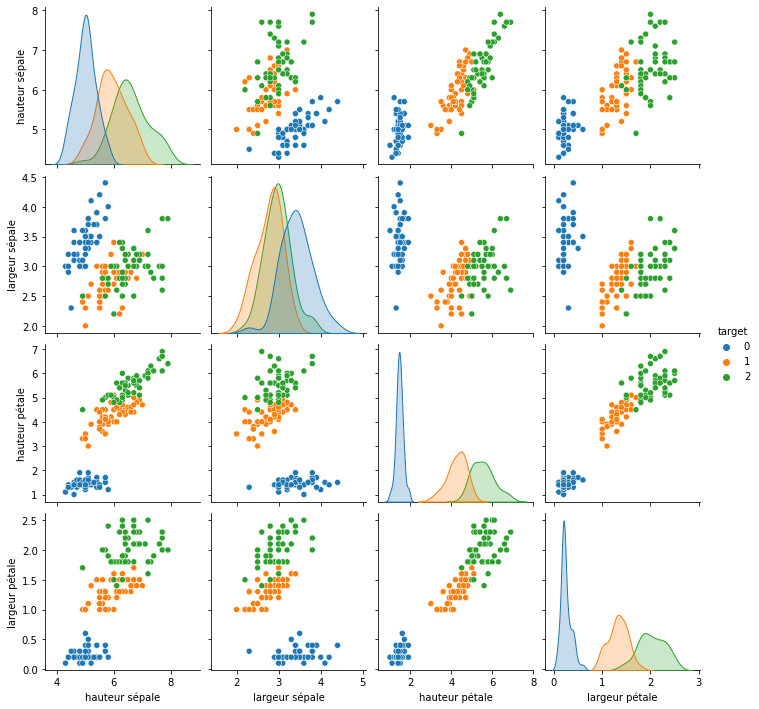

In [5]:
import seaborn as sns
df_iris['target']=[str(x) for x in target]
sns.pairplot(df_iris,hue='target')

In [6]:
pp.ProfileReport(df_iris)

#### Une projection en 2D (ACP)
(C'est rapide mais c'est l'idée.)

  Ce jeu a donc la particularité d'être dans un espace de dimension quatre abritant trois espèces de fleurs presque tout en étant preque séparable en choisissant un plan en 2D ([un tutoriel mettant en avant une ACP](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html))

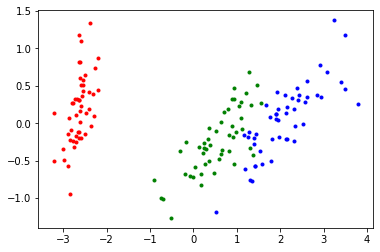

In [45]:
pca = PCA(n_components=3)
pca.fit(data)
X_pca = pca.transform(data)
labels = np.unique(target)
color=['r','g','b']
for l in labels:
    plt.plot(X_pca[np.where(target==l),0],X_pca[np.where(target==l),1],color[l]+'.')

In [8]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",pca.explained_variance_)
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",pca.explained_variance_ratio_*100)
    print("pourcentages d'inertie cumulées:\n",np.cumsum(pca.explained_variance_ratio_)*100)

 * valeurs propres des axes/facteurs (ordonnées) :
 [4.23 0.24 0.08 0.02]
pourcentages d'inertie :
 [ 92.462   5.307   1.710   0.521]
pourcentages d'inertie cumulées:
 [ 92.462  97.769  99.479  100.000]


#### Une projection en 2D (TSNE)
(C'est rapide mais c'est l'idée.)

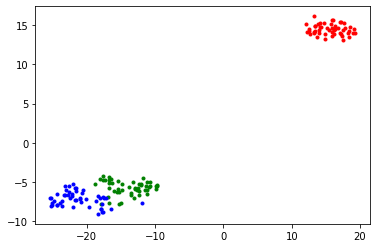

In [50]:
tsne = TSNE(n_components=2, init='random', random_state=0)
X_tsne = tsne.fit_transform(data)
labels = np.unique(target)
color=['r','g','b']
for l in labels:
    plt.plot(X_tsne[np.where(target==l),0],X_tsne[np.where(target==l),1],color[l]+'.')

***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)

In [46]:
de=pd.DataFrame(X_pca,columns=["c1","c2","c3"])
df['target']=target

In [47]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(de, x='c1', y='c2', z='c3',color=target)
fig.show()

,0,1,2
0,-27.823656,-14.801400,-120.078453
1,-40.028725,104.510025,-114.689697
2,-105.520241,47.419235,-107.645203
3,-86.176147,-106.194130,-69.222946
4,85.550995,84.745941,-100.015030
...,...,...,...
145,3.614983,-95.148758,95.915657
146,9.288421,-71.664360,8.323455
147,-1.316248,-86.441727,53.628181
148,3.357460,31.965717,87.255653
